In [1]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict

In [3]:
regex = re.compile(r'Activities\slog:(.*)Trade\sHistory:', re.DOTALL)
activity_log = ""
with open('../logs/8fff0ecf-7477-4ef6-a709-ab087603fc92.log', 'r') as f, open('test.csv', 'w') as f_csv:
    text = f.read()
    match = regex.search(text)
    activity_log = match.group(1)

    rows = activity_log.strip().split('\n')
    writer = csv.writer(f_csv, delimiter=';')
    for row in rows:
        writer.writerow(row.split(';'))



# Convert CSV string to DataFrame
df = pd.read_csv(io.StringIO(activity_log), sep=';')
df['timestamp'] = df['timestamp'].apply(lambda x: x/100).astype(int)
df


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,1,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.000000
3,-2,1,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,0.000000
4,-2,2,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-2,1997,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,0.000000
3996,-2,1998,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,766.054688
3997,-2,1998,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,0.000000
3998,-2,1999,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,763.968750


<Axes: xlabel='timestamp'>

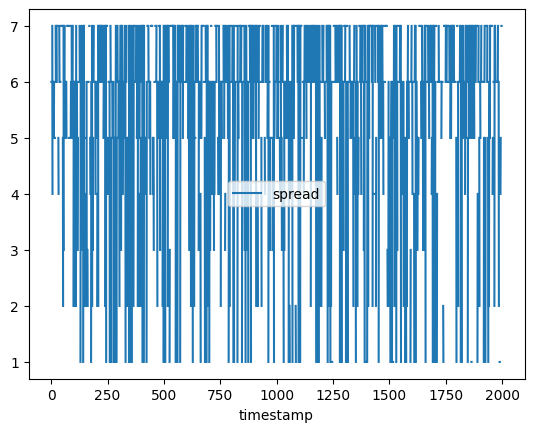

In [20]:
df['spread'] = df[(df['product']=='STARFRUIT')]['ask_price_1'] - df[(df['product']=='STARFRUIT')]['bid_price_1']
df.plot.line(x='timestamp', y='spread')


<Axes: xlabel='spread'>

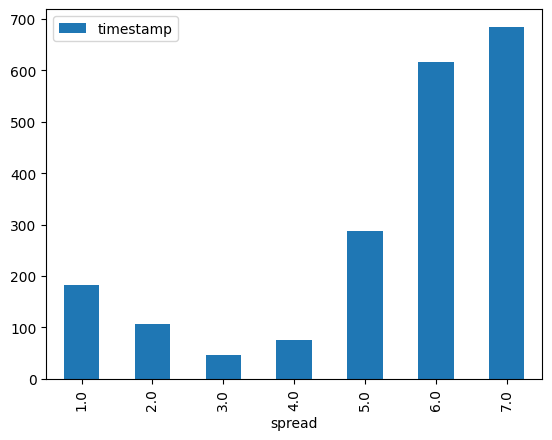

In [29]:
df.groupby(['spread']).count().reset_index().plot.bar(x='spread', y='timestamp')

In [30]:
df.groupby(['spread']).count()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
spread,,,,,,,,,,,,,,,,,
1.0,183,183,183,183,183,95,95,23,23,183,183,122,122,32,32,183,183
2.0,107,107,107,107,107,92,92,22,22,107,107,34,34,7,7,107,107
3.0,46,46,46,46,46,18,18,6,6,46,46,35,35,13,13,46,46
4.0,76,76,76,76,76,71,71,8,8,76,76,51,51,0,0,76,76
5.0,287,287,287,287,287,62,62,0,0,287,287,279,279,52,52,287,287
6.0,616,616,616,616,616,416,416,0,0,616,616,171,171,0,0,616,616
7.0,685,685,685,685,685,0,0,0,0,685,685,0,0,0,0,685,685


In [45]:
spread_diffs = defaultdict(int)

df_sf = df[df['product'] == "STARFRUIT"]
last_spread = None
for idx, row in df_sf.iterrows():
    cur_spread = row['spread']
    if last_spread:
        spread_diff = cur_spread - last_spread
        spread_diffs[spread_diff] += 1
    last_spread = cur_spread

print(spread_diffs)

defaultdict(<class 'int'>, {5.0: 93, 0.0: 505, 1.0: 316, -3.0: 58, 2.0: 142, -1.0: 319, -2.0: 144, 3.0: 57, -4.0: 74, -6.0: 64, 6.0: 65, 4.0: 72, -5.0: 90})


In [49]:
spread_diffs = [(k, v) for k,v in spread_diffs.items()]

sorted(spread_diffs, key=lambda x: x[1])

[(3.0, 57),
 (-3.0, 58),
 (-6.0, 64),
 (6.0, 65),
 (4.0, 72),
 (-4.0, 74),
 (-5.0, 90),
 (5.0, 93),
 (2.0, 142),
 (-2.0, 144),
 (1.0, 316),
 (-1.0, 319),
 (0.0, 505)]

# Trade data extraction

In [4]:
regex = re.compile(r'Trade\sHistory:\n(.*)', re.DOTALL)
trade_records = ""
with open('2024.log') as f:
    text = f.read()
    match = regex.search(text)
    trade_records = match.group(1)
trade_records = json.loads(trade_records)
trade_records

[{'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10004,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10002,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 13},
 {'timestamp': 100,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 9996,
  'quantity': 2},
 {'timestamp': 200,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 4997,
  'quantity': 2},
 

In [6]:
df = pd.DataFrame(trade_records)
df.to_csv('trade_test.csv', index=False, sep=';')